In [1]:
# Importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import urllib
import deepface
from retinaface import RetinaFace

# A function for plotting the images


def plotImages(img):
	plt.imshow(img, cmap="gray")
	plt.axis('off')
	plt.style.use('seaborn')
	plt.show()


from urllib.request import urlopen
def url_to_image(url, readFlag=cv2.IMREAD_COLOR):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, readFlag)

    # return the image
    return image
    


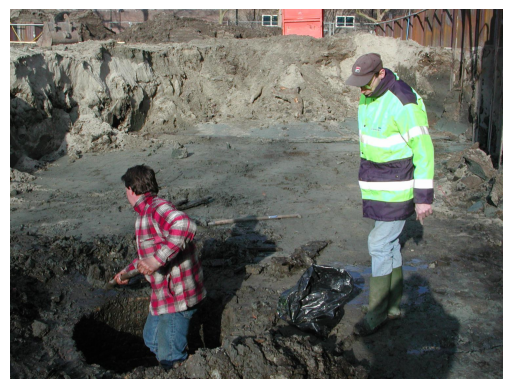

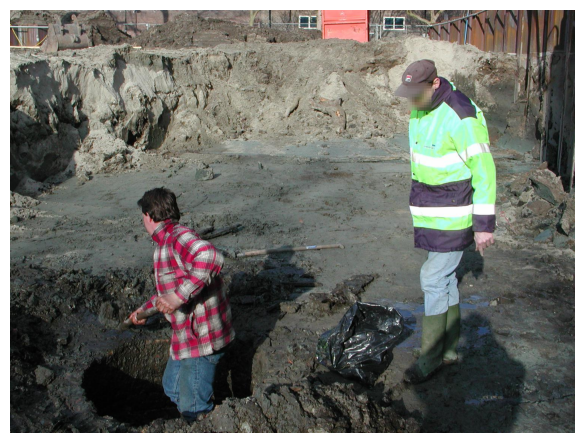

In [2]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def anonymize_face_pixelate(image, blocks=3):
	# divide the input image into NxN blocks
	(h, w) = image.shape[:2]
	xSteps = np.linspace(0, w, blocks + 1, dtype="int")
	ySteps = np.linspace(0, h, blocks + 1, dtype="int")
	# loop over the blocks in both the x and y direction
	for i in range(1, len(ySteps)):
		for j in range(1, len(xSteps)):
			# compute the starting and ending (x, y)-coordinates
			# for the current block
			startX = xSteps[j - 1]
			startY = ySteps[i - 1]
			endX = xSteps[j]
			endY = ySteps[i]
			# extract the ROI using NumPy array slicing, compute the
			# mean of the ROI, and then draw a rectangle with the
			# mean RGB values over the ROI in the original image
			roi = image[startY:endY, startX:endX]
			(B, G, R) = [int(x) for x in cv2.mean(roi)[:3]]
			cv2.rectangle(image, (startX, startY), (endX, endY),
				(B, G, R), -1)
	# return the pixelated blurred image
	return image



def blur_faces(colored_img, scaleFactor = 1.1):
    img_copy = np.copy(colored_img)
    
    #let's detect images and put them in a list
    dt = RetinaFace.detect_faces(img_copy)
    faces = [faces['facial_area'] for faces in dt.values()]

    #go over list of faces and blur them as rectangles on original colored img
    for (x, y, w, h) in faces:
        roi = img_copy[y:h, x:w]
        roi = cv2.blur(roi, (20, 20))
        roi = anonymize_face_pixelate(roi, 10)
        img_copy[y:y+roi.shape[0], x:x+roi.shape[1]] = roi
        
    return convertToRGB(img_copy)


#load another image
test2 = cv2.imread('6218a4573cdebfd6626d1c36.jpeg')
#test2 = cv2.imread('neutral-frontal-female-senior-face-29507822.jpg')

faces_detected_img = blur_faces(test2)
plotImages(convertToRGB(test2))
plotImages(faces_detected_img)

In [3]:
#!pip install deepface
from deepface import DeepFace
obj = DeepFace.verify('neutral-frontal-female-senior-face-29507822.jpg', 'neutral-frontal-female-senior-face-29507822.jpg'
          , model_name = 'ArcFace', detector_backend = 'retinaface')
print(obj["verified"])

True


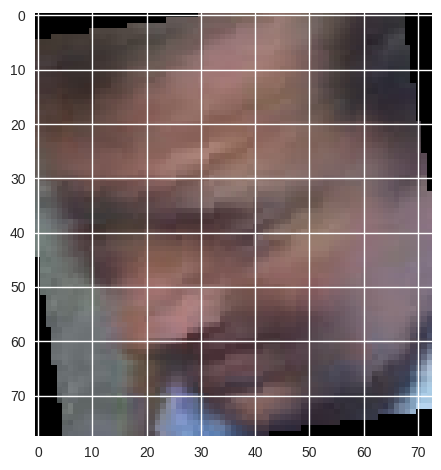

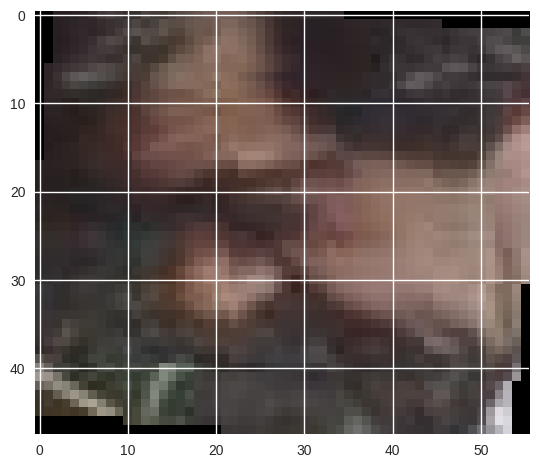

In [4]:
import matplotlib.pyplot as plt
from retinaface import RetinaFace
faces = RetinaFace.extract_faces(img_path = '6218a48b98ef859438f2cab4.jpeg', align = True)
for face in faces:
  plt.imshow(face)
  plt.show()